# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Load the Data

In [2]:
file_path = "/content/ASELS.csv"
data = pd.read_csv(file_path)

data.head()

,TRADE DATE,INSTRUMENT SERIES CODE,INSTRUMENT NAME,MARKET SEGMENT,MARKET,INSTRUMENT TYPE,INSTRUMENT CLASS,MARKET MAKER,BIST 100 INDEX,BIST 30 INDEX,...,SHORT SALE VWAP,TRADED VALUE OF SHORT SALE TRADES,TRADED VOLUME OF SHORT SALE TRADES,NUMBER OF CONTRACTS OF SHORT SALE TRADES,LOWEST TRADE REPORT PRICE,HIGHEST TRADE REPORT PRICE,TRADE REPORT VWAP,TRADE REPORT TRADED VALUE,TRADE REPORT TRADED VOLUME,NUMBER OF TRADE REPORTS
0,2015-11-30,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.541,1123013.36,67893,198,0.0,0.0,0.0,0.0,0,0
1,2015-12-01,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.825,887236.89,52734,82,0.0,0.0,0.0,0.0,0,0
2,2015-12-02,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.905,252597.73,14942,75,0.0,0.0,0.0,0.0,0,0
3,2015-12-03,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.620,1183598.07,71216,178,0.0,0.0,0.0,0.0,0,0
4,2015-12-04,ASELS,ASELSAN,Z,MSPOT,MSPOTEQT,MSPOTEQTASELS,0,1,0,...,16.239,872771.40,53747,206,0.0,0.0,0.0,0.0,0,0


In [3]:
# Get the basic statistical information
data.describe()

,MARKET MAKER,BIST 100 INDEX,BIST 30 INDEX,GROSS SETTLEMENT,SUSPENDED,OPENING PRICE,OPENING SESSION PRICE,LOWEST PRICE,HIGHEST PRICE,CLOSING PRICE,...,SHORT SALE VWAP,TRADED VALUE OF SHORT SALE TRADES,TRADED VOLUME OF SHORT SALE TRADES,NUMBER OF CONTRACTS OF SHORT SALE TRADES,LOWEST TRADE REPORT PRICE,HIGHEST TRADE REPORT PRICE,TRADE REPORT VWAP,TRADE REPORT TRADED VALUE,TRADE REPORT TRADED VOLUME,NUMBER OF TRADE REPORTS
count,1531.0,1531.000000,1531.000000,1531.0,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,...,1531.000000,1.531000e+03,1.531000e+03,1531.000000,1531.000000,1531.000000,1531.000000,1.531000e+03,1531.000000,1531.000000
mean,0.0,0.998694,0.776617,0.0,0.007185,20.482057,20.438459,20.181274,20.794559,20.460098,...,18.616374,3.711852e+07,1.754141e+06,2353.250816,0.169569,0.169700,0.169634,6.351541e+04,2730.532332,0.007838
std,0.0,0.036131,0.416649,0.0,0.084486,6.669330,6.729588,6.513365,6.817384,6.648436,...,8.107131,6.846502e+07,2.976624e+06,3519.695042,2.088118,2.089678,2.088897,8.510560e+05,35099.325839,0.095335
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.0,1.000000,1.000000,0.0,0.000000,16.625000,16.605000,16.480000,16.870000,16.665000,...,15.205500,1.121957e+06,8.263600e+04,241.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.0,0.000000,18.950000,18.940000,18.740000,19.220000,18.910000,...,18.272000,1.513835e+07,6.557720e+05,947.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,0.0,1.000000,1.000000,0.0,0.000000,25.370000,25.370000,24.850000,26.080000,25.490000,...,24.022000,4.248591e+07,2.256238e+06,3311.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
max,0.0,1.000000,1.000000,0.0,1.000000,45.600000,45.600000,42.300000,47.260000,45.260000,...,45.934000,7.259476e+08,2.750961e+07,32814.000000,31.820000,31.820000,31.820000,1.911114e+07,761400.000000,2.000000


# Preprocessing

## Determine the Missing Values in the Dataset

In [4]:
# Analyze the missing values ​​in the data set
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


## Determine the Categorical and Numerical Features in the Dataset

In [5]:
# Determine the categorical and numerical features
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

print("Categorical Features:", categorical_columns)
print("-" * 100, end="\n\n")
print("Numerical Features:", numeric_columns)

Categorical Features: Index(['TRADE DATE', 'INSTRUMENT SERIES CODE', 'INSTRUMENT NAME',
       'MARKET SEGMENT', 'MARKET', 'INSTRUMENT TYPE', 'INSTRUMENT CLASS'],
      dtype='object')
----------------------------------------------------------------------------------------------------

Numerical Features: Index(['MARKET MAKER', 'BIST 100 INDEX', 'BIST 30 INDEX', 'GROSS SETTLEMENT',
       'SUSPENDED', 'OPENING PRICE', 'OPENING SESSION PRICE', 'LOWEST PRICE',
       'HIGHEST PRICE', 'CLOSING PRICE', 'CLOSING SESSION PRICE',
       'CHANGE TO PREVIOUS CLOSING (%)', 'REMAINING BID', 'REMAINING ASK',
       'VWAP', 'TOTAL TRADED VALUE', 'TOTAL TRADED VOLUME',
       'TOTAL NUMBER OF CONTRACTS', 'REFERENCE PRICE',
       'TRADED VALUE AT OPENING SESSION', 'TRADED VOLUME AT OPENING SESSION',
       'NUMBER OF CONTRACTS AT OPENING SESSION',
       'TRADED VALUE AT CLOSING SESSION', 'TRADED VOLUME AT CLOSING SESSION',
       'NUMBER OF CONTRACTS AT CLOSING SESSION',
       'TRADED VALUE OF TRA

# Visualize the Data

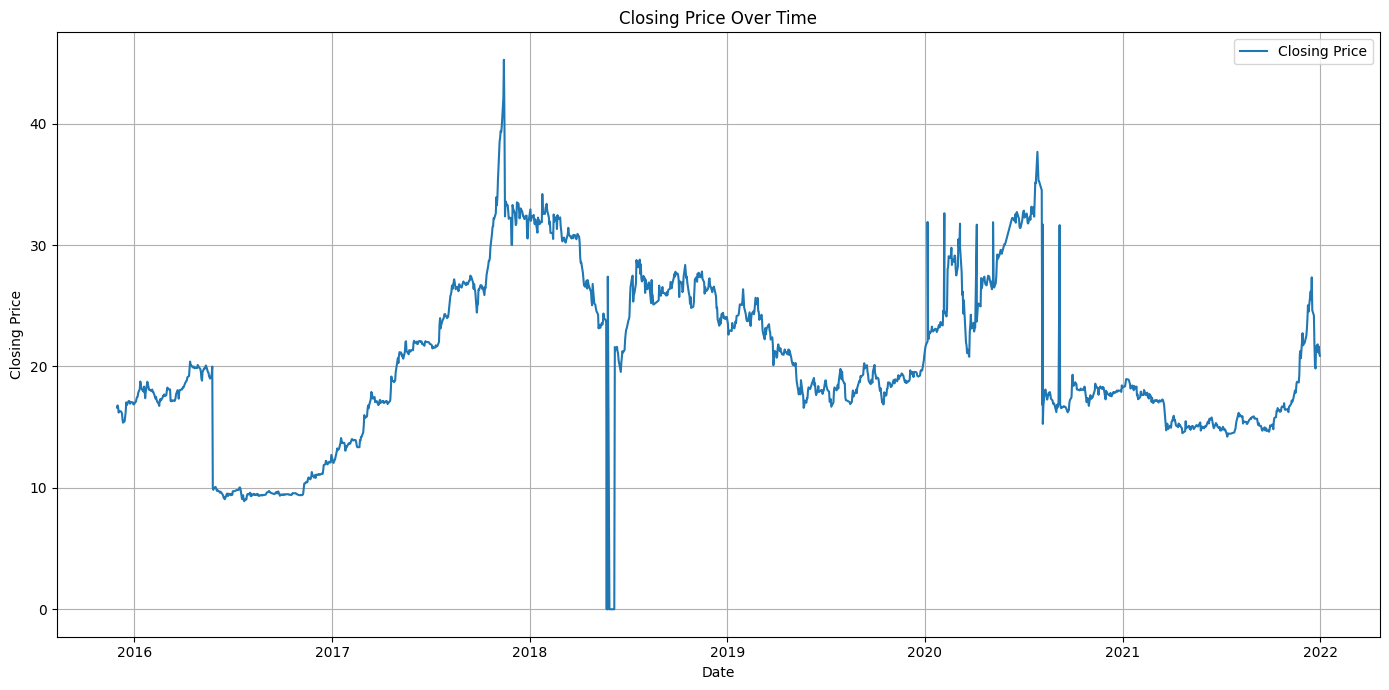

In [6]:
data['TRADE DATE'] = pd.to_datetime(data['TRADE DATE'])

# Plot closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['TRADE DATE'], data['CLOSING PRICE'], label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Feature Engineering

In [12]:
# Convert the TRADE DATE column to time format
data['TRADE DATE'] = pd.to_datetime(data['TRADE DATE'])

# Calculate the daily closing opening difference
data['CLOSING_OPEN_DIFF'] = data['CLOSING PRICE'] - data['OPENING PRICE']

# Calculate the 7-14-21 day moving average
data['7_DAY_MOVING_AVG'] = data['CLOSING PRICE'].rolling(window=7).mean()
data['14_DAY_MOVING_AVG'] = data['CLOSING PRICE'].rolling(window=14).mean()
data['21_DAY_MOVING_AVG'] = data['CLOSING PRICE'].rolling(window=21).mean()

# Provide the model with historical trading activity.
for lag in range(1, 8):
    data[f'TOTAL_TRADED_VOLUME_LAG_{lag}'] = data['TOTAL TRADED VOLUME'].shift(lag - 1)
    data[f'TOTAL_TRADED_VALUE_LAG_{lag}'] = data['TOTAL TRADED VALUE'].shift(lag - 1)

# Capture short-term trends and patterns.
for lag in range(1, 8):
    data[f'CLOSING_PRICE_LAG_{lag}'] = data['CLOSING PRICE'].shift(lag - 1)

# Features of the previous day
data["PREVIOUS_DAY_OPENING_DIFF"] = data["OPENING PRICE"].shift(1) - data["OPENING PRICE"]

data["7_DAY_MOVING_VWAP_AVG"] = data["VWAP"].rolling(window=7).mean()

# Calculate the max price difference in one day
data['PRICE_RANGE'] = data['HIGHEST PRICE'] - data['LOWEST PRICE']

# EMAs give more weight to recent prices, potentially capturing more recent trends.
data['7_DAY_EMA'] = data['CLOSING PRICE'].ewm(span=7, adjust=False).mean()

## Examine the Features Which are Most Correlated with the Closing Price

In [13]:
# Instead of dropping NA from numeric_columns directly,
# create a mask to select rows with no missing values in either features or target.
mask = data.notna().all(axis=1)

# Apply the mask to both numeric features and the target variable.
X_train = data.select_dtypes(include=[np.number])[mask]
Y_train = data["CLOSING PRICE"][mask]

<Axes: >

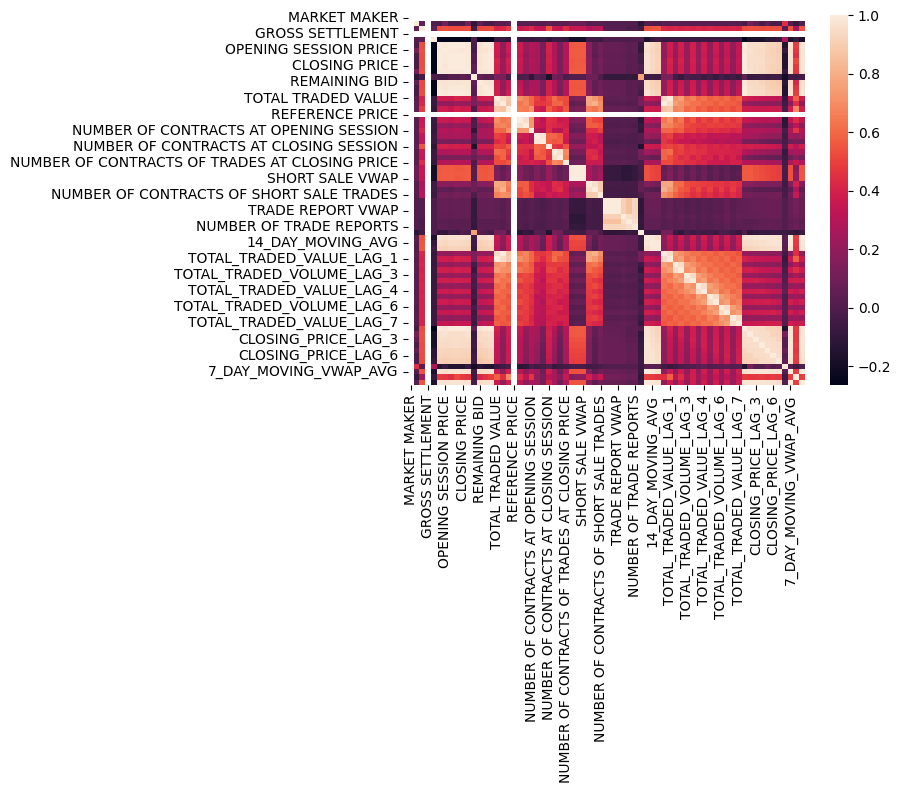

In [14]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix)

To find the best features, I took advantage of both sklearn's feature_selection f_regression and RandomForestRegressor.

In [15]:
selector = SelectKBest(f_regression, k=65)
selector.fit(X_train, Y_train)

k_best_feature = X_train.columns[selector.get_support()]

# Sort the features with respect to the their importances
k_best_feature = k_best_feature[np.argsort(selector.scores_[selector.get_support()])[::-1]]

In [16]:
k_best_feature

Index(['CLOSING PRICE', 'CLOSING_PRICE_LAG_1', 'VWAP', 'LOWEST PRICE',
       'HIGHEST PRICE', 'OPENING PRICE', 'CLOSING SESSION PRICE',
       'REMAINING ASK', 'OPENING SESSION PRICE', '7_DAY_EMA', 'REMAINING BID',
       '7_DAY_MOVING_AVG', '7_DAY_MOVING_VWAP_AVG', 'CLOSING_PRICE_LAG_2',
       'CLOSING_PRICE_LAG_3', 'CLOSING_PRICE_LAG_4', '14_DAY_MOVING_AVG',
       'CLOSING_PRICE_LAG_5', 'CLOSING_PRICE_LAG_6', '21_DAY_MOVING_AVG',
       'CLOSING_PRICE_LAG_7', 'HIGHEST SHORT SALE PRICE', 'SHORT SALE VWAP',
       'LOWEST SHORT SALE PRICE', 'BIST 30 INDEX', 'PRICE_RANGE',
       'TOTAL TRADED VALUE', 'TOTAL_TRADED_VALUE_LAG_1',
       'NUMBER OF CONTRACTS AT CLOSING SESSION', 'TOTAL_TRADED_VALUE_LAG_3',
       'TOTAL_TRADED_VALUE_LAG_2', 'TOTAL NUMBER OF CONTRACTS',
       'TOTAL_TRADED_VALUE_LAG_4', 'TOTAL_TRADED_VALUE_LAG_5',
       'TOTAL_TRADED_VALUE_LAG_6', 'TRADED VALUE AT OPENING SESSION',
       'TOTAL_TRADED_VALUE_LAG_7',
       'NUMBER OF CONTRACTS OF TRADES AT CLOSING PRI

In [17]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=65)
rfe.fit(X_train, Y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=65)

In [18]:
rfe_feature = X_train.columns[rfe.support_]

# Sort the features with respect to the their importances
rfe_feature = rfe_feature[np.argsort(rfe.estimator_.feature_importances_)[::-1]]
rfe_feature

Index(['CLOSING_PRICE_LAG_1', 'CLOSING PRICE', 'CLOSING SESSION PRICE',
       'REMAINING ASK', 'REMAINING BID', 'VWAP', 'LOWEST PRICE',
       'HIGHEST PRICE', 'OPENING SESSION PRICE', 'OPENING PRICE',
       'SHORT SALE VWAP', 'TOTAL_TRADED_VALUE_LAG_1',
       'NUMBER OF CONTRACTS AT CLOSING SESSION', 'SUSPENDED',
       'HIGHEST SHORT SALE PRICE', 'TOTAL TRADED VALUE', 'PRICE_RANGE',
       'LOWEST SHORT SALE PRICE', 'TRADED VOLUME AT CLOSING SESSION',
       'TRADED VOLUME AT OPENING SESSION', 'TRADED VALUE AT OPENING SESSION',
       'TRADED VALUE AT CLOSING SESSION', 'TOTAL_TRADED_VOLUME_LAG_1',
       'TOTAL NUMBER OF CONTRACTS', 'NUMBER OF CONTRACTS AT OPENING SESSION',
       'TOTAL_TRADED_VALUE_LAG_2', 'TOTAL TRADED VOLUME',
       'TOTAL_TRADED_VOLUME_LAG_3', 'BIST 30 INDEX', 'CLOSING_PRICE_LAG_3',
       'CLOSING_PRICE_LAG_2', '7_DAY_MOVING_VWAP_AVG', '7_DAY_EMA',
       'CLOSING_PRICE_LAG_7', '14_DAY_MOVING_AVG', 'TOTAL_TRADED_VALUE_LAG_6',
       'TOTAL_TRADED_VOLUME_LAG

In [20]:
# Select the important features based on the above importance scores
important_features = ['TRADE DATE', 'CLOSING PRICE', 'CLOSING_OPEN_DIFF', "TRADED VOLUME AT OPENING SESSION", "REMAINING ASK",
                      '7_DAY_MOVING_AVG', '14_DAY_MOVING_AVG', '21_DAY_MOVING_AVG', "CHANGE TO PREVIOUS CLOSING (%)",
                      'TOTAL TRADED VALUE', 'TOTAL TRADED VOLUME', 'OPENING PRICE', "OPENING SESSION PRICE", "7_DAY_EMA",
                      'SUSPENDED', 'TRADED VALUE AT CLOSING SESSION', "NUMBER OF CONTRACTS AT CLOSING SESSION",
                      'CLOSING_PRICE_LAG_1', 'CLOSING_PRICE_LAG_2', 'CLOSING_PRICE_LAG_3', 'CLOSING_PRICE_LAG_4', 'CLOSING_PRICE_LAG_5', 'CLOSING_PRICE_LAG_6', 'CLOSING_PRICE_LAG_7',
                      'PRICE_RANGE', "LOWEST PRICE", "VWAP", "TRADED VALUE AT OPENING SESSION",
                      "TOTAL_TRADED_VALUE_LAG_1", 'TOTAL_TRADED_VALUE_LAG_2', "TOTAL_TRADED_VALUE_LAG_3", "TOTAL_TRADED_VALUE_LAG_4", 'TOTAL_TRADED_VALUE_LAG_5', "TOTAL_TRADED_VALUE_LAG_6", "TOTAL_TRADED_VALUE_LAG_7",
                      'TOTAL_TRADED_VOLUME_LAG_1', 'TOTAL_TRADED_VOLUME_LAG_2', 'TOTAL_TRADED_VOLUME_LAG_3', 'TOTAL_TRADED_VOLUME_LAG_4', 'TOTAL_TRADED_VOLUME_LAG_5', 'TOTAL_TRADED_VOLUME_LAG_6', 'TOTAL_TRADED_VOLUME_LAG_7',
                      "HIGHEST PRICE", "PREVIOUS_DAY_OPENING_DIFF", "7_DAY_MOVING_VWAP_AVG"]

selected_data = data[important_features]
selected_data.head(55)

,TRADE DATE,CLOSING PRICE,CLOSING_OPEN_DIFF,TRADED VOLUME AT OPENING SESSION,REMAINING ASK,7_DAY_MOVING_AVG,14_DAY_MOVING_AVG,21_DAY_MOVING_AVG,CHANGE TO PREVIOUS CLOSING (%),TOTAL TRADED VALUE,...,TOTAL_TRADED_VOLUME_LAG_1,TOTAL_TRADED_VOLUME_LAG_2,TOTAL_TRADED_VOLUME_LAG_3,TOTAL_TRADED_VOLUME_LAG_4,TOTAL_TRADED_VOLUME_LAG_5,TOTAL_TRADED_VOLUME_LAG_6,TOTAL_TRADED_VOLUME_LAG_7,HIGHEST PRICE,PREVIOUS_DAY_OPENING_DIFF,7_DAY_MOVING_VWAP_AVG
0,2015-11-30,16.61,0.51,1628,16.66,NaN,NaN,NaN,0.000,33741904.94,...,2034094.0,NaN,NaN,NaN,NaN,NaN,NaN,17.02,NaN,NaN
1,2015-12-01,16.79,0.13,5494,16.80,NaN,NaN,NaN,1.084,17016639.26,...,1011765.0,2034094.0,NaN,NaN,NaN,NaN,NaN,16.98,-0.56,NaN
2,2015-12-02,16.60,-0.25,7845,16.63,NaN,NaN,NaN,-1.132,15771533.97,...,934411.0,1011765.0,2034094.0,NaN,NaN,NaN,NaN,17.14,-0.19,NaN
3,2015-12-03,16.20,-0.45,1806,16.21,NaN,NaN,NaN,-2.410,10625788.68,...,640974.0,934411.0,1011765.0,2034094.0,NaN,NaN,NaN,16.90,0.20,NaN
4,2015-12-04,16.34,0.04,4150,16.34,NaN,NaN,NaN,0.864,6707047.98,...,414105.0,640974.0,934411.0,1011765.0,2034094.0,NaN,NaN,16.38,0.35,NaN
5,2015-12-07,16.30,-0.09,2220,16.32,NaN,NaN,NaN,-0.245,9374557.21,...,569440.0,414105.0,640974.0,934411.0,1011765.0,2034094.0,NaN,16.80,-0.09,NaN
6,2015-12-08,16.24,-0.16,2378,16.31,16.440000,NaN,NaN,-0.368,8196067.53,...,500587.0,569440.0,414105.0,640974.0,934411.0,1011765.0,2034094.0,16.55,-0.01,16.556571
7,2015-12-09,16.16,-0.13,2978,16.19,16.375714,NaN,NaN,-0.493,7545277.85,...,465370.0,500587.0,569440.0,414105.0,640974.0,934411.0,1011765.0,16.38,0.11,16.503143
8,2015-12-10,15.71,-0.46,2626,15.73,16.221429,NaN,NaN,-2.785,7011050.88,...,441855.0,465370.0,500587.0,569440.0,414105.0,640974.0,934411.0,16.30,0.12,16.367143
9,2015-12-11,15.37,-0.36,2345,15.40,16.045714,NaN,NaN,-2.164,12255699.32,...,796590.0,441855.0,465370.0,500587.0,569440.0,414105.0,640974.0,15.85,0.44,16.153714


In [21]:
# Clean the NaN values
selected_data = selected_data.dropna()

# Split the data set 80/100 for training; 20/100 for testing
train_size = int(len(selected_data) * 0.8)
train_data = selected_data[:train_size]
test_data = selected_data[train_size:]

In [22]:
train_data.tail()

,TRADE DATE,CLOSING PRICE,CLOSING_OPEN_DIFF,TRADED VOLUME AT OPENING SESSION,REMAINING ASK,7_DAY_MOVING_AVG,14_DAY_MOVING_AVG,21_DAY_MOVING_AVG,CHANGE TO PREVIOUS CLOSING (%),TOTAL TRADED VALUE,...,TOTAL_TRADED_VOLUME_LAG_1,TOTAL_TRADED_VOLUME_LAG_2,TOTAL_TRADED_VOLUME_LAG_3,TOTAL_TRADED_VOLUME_LAG_4,TOTAL_TRADED_VOLUME_LAG_5,TOTAL_TRADED_VOLUME_LAG_6,TOTAL_TRADED_VOLUME_LAG_7,HIGHEST PRICE,PREVIOUS_DAY_OPENING_DIFF,7_DAY_MOVING_VWAP_AVG
1223,2020-10-09,18.11,-0.03,105454,18.12,18.420000,17.944286,17.494286,0.055,7.105151e+08,...,39179568.0,60760253.0,50741762.0,32641173.0,47180064.0,69607578.0,91133826.0,18.27,0.48,18.602429
1224,2020-10-12,18.05,-0.11,156732,18.06,18.351429,18.066429,17.561905,-0.331,4.765848e+08,...,26245232.0,39179568.0,60760253.0,50741762.0,32641173.0,47180064.0,69607578.0,18.29,-0.02,18.438857
1225,2020-10-13,18.03,-0.07,216292,18.03,18.298571,18.185714,17.623810,-0.111,7.086703e+08,...,39050512.0,26245232.0,39179568.0,60760253.0,50741762.0,32641173.0,47180064.0,18.35,0.06,18.381429
1226,2020-10-14,18.08,0.01,95867,18.09,18.210000,18.265000,17.690000,0.277,5.037532e+08,...,27870164.0,39050512.0,26245232.0,39179568.0,60760253.0,50741762.0,32641173.0,18.18,0.03,18.291143
1227,2020-10-15,18.18,0.09,184668,18.19,18.158571,18.333571,17.761905,0.553,6.631919e+08,...,36563157.0,27870164.0,39050512.0,26245232.0,39179568.0,60760253.0,50741762.0,18.30,-0.02,18.210714


In [23]:
test_data.head()

,TRADE DATE,CLOSING PRICE,CLOSING_OPEN_DIFF,TRADED VOLUME AT OPENING SESSION,REMAINING ASK,7_DAY_MOVING_AVG,14_DAY_MOVING_AVG,21_DAY_MOVING_AVG,CHANGE TO PREVIOUS CLOSING (%),TOTAL TRADED VALUE,...,TOTAL_TRADED_VOLUME_LAG_1,TOTAL_TRADED_VOLUME_LAG_2,TOTAL_TRADED_VOLUME_LAG_3,TOTAL_TRADED_VOLUME_LAG_4,TOTAL_TRADED_VOLUME_LAG_5,TOTAL_TRADED_VOLUME_LAG_6,TOTAL_TRADED_VOLUME_LAG_7,HIGHEST PRICE,PREVIOUS_DAY_OPENING_DIFF,7_DAY_MOVING_VWAP_AVG
1228,2020-10-16,18.05,-0.15,229663,18.06,18.085714,18.375714,17.828571,-0.715,4.481126e+08,...,24775435.0,36563157.0,27870164.0,39050512.0,26245232.0,39179568.0,60760253.0,18.24,-0.11,18.138286
1229,2020-10-19,18.10,0.01,128445,18.10,18.085714,18.339286,17.901429,0.277,3.947109e+08,...,21773600.0,24775435.0,36563157.0,27870164.0,39050512.0,26245232.0,39179568.0,18.19,0.11,18.124286
1230,2020-10-20,18.18,0.06,161080,18.19,18.095714,18.257857,17.994762,0.442,8.994237e+08,...,49283577.0,21773600.0,24775435.0,36563157.0,27870164.0,39050512.0,26245232.0,18.37,-0.03,18.140714
1231,2020-10-21,18.07,-0.18,192632,18.08,18.098571,18.225000,18.077143,-0.605,3.528652e+08,...,19429052.0,49283577.0,21773600.0,24775435.0,36563157.0,27870164.0,39050512.0,18.27,-0.13,18.141143
1232,2020-10-22,18.34,0.25,172900,18.35,18.142857,18.220714,18.171429,1.494,9.695313e+08,...,53037445.0,19429052.0,49283577.0,21773600.0,24775435.0,36563157.0,27870164.0,18.49,0.16,18.160000


# Create the Train and the Test Data

In [24]:
# Seperate the features and target variable
feature_columns = important_features[2:]  # Exclude the date and closing price column
train_features = train_data[feature_columns]
train_target = train_data['CLOSING PRICE']

test_features = test_data[feature_columns]
test_target = test_data['CLOSING PRICE']

# Scale the data between 0 and 1
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Make the time series data suitable for the LSTM model
def create_sequences(data, target, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        labels.append(target[i + window_size])
    return np.array(sequences), np.array(labels)

window_size = 7  # We will predict the next day using 7 days of data
x_train, y_train = create_sequences(train_features, train_target.values, window_size)
x_test, y_test = create_sequences(test_features, test_target.values, window_size)

# Create the Model

In [42]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                          strides=1, padding="causal",
                          activation="relu",
                          input_shape=(x_train.shape[1], x_train.shape[2])),

        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    return model

model = create_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 64)               │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,393 (950.75 KB)

 Trainable params: 243,393 (950.75 KB)

 Non-trainable params: 0 (0.00 B)

# Tune the Learning Rate

In [43]:
# Get initial weights
init_weights = model.get_weights()

In [44]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,  metrics=["mae"])

# Train the model
history = model.fit(x_train, y_train, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 20.8270 - mae: 21.3219 - learning_rate: 1.0000e-06
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 20.9933 - mae: 21.4910 - learning_rate: 1.1220e-06
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 20.9332 - mae: 21.4289 - learning_rate: 1.2589e-06
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 20.9393 - mae: 21.4346 - learning_rate: 1.4125e-06
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 20.5108 - mae: 21.0048 - learning_rate: 1.5849e-06
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 21.0216 - mae: 21.5172 - learning_rate: 1.7783e-06
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 20.8957 - mae: 21.3928 - learning_rate: 1.9953e-06
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 20.9847 - mae: 21.4809 - learning_rate: 2.2387e-06
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 21.1042 - mae: 21.5992 - learning_rate: 2.5119e-06
E

(1e-06, 0.001, 0.0, 100.0)

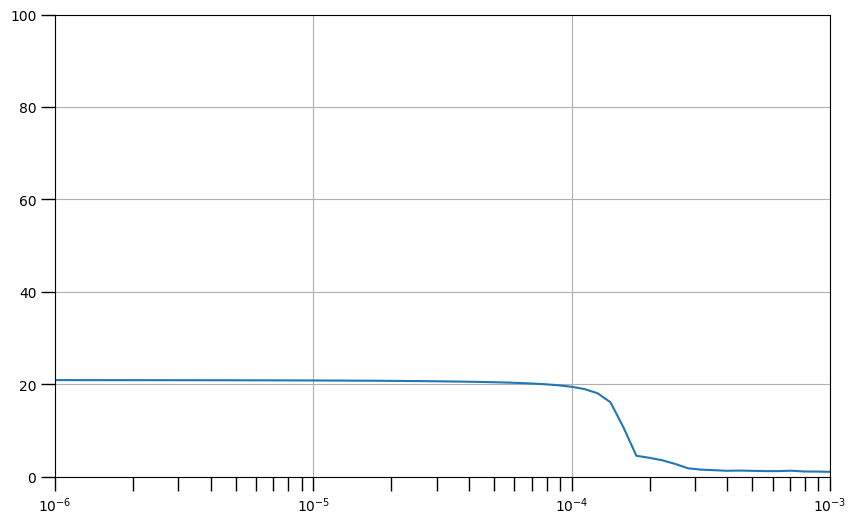

In [45]:
# Define the learning rate array
lrs = 1e-6 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-6, 1e-3, 0, 100])

# Train the Model

In [46]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [47]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=40, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_mae')
callbacks = [early_stopping, model_checkpoint]

epochs = 250
batch_size = 32

initial_learning_rate= 0.0045

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=400,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer, metrics=["mae"])

In [48]:
history = model.fit(x_train, y_train, epochs=epochs,
                    batch_size=batch_size, verbose=1,
                    validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 19.2759 - mae: 19.7735 - val_loss: 4.2769 - val_mae: 4.7769
Epoch 2/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.6315 - mae: 7.1177 - val_loss: 1.4727 - val_mae: 1.9540
Epoch 3/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.9824 - mae: 2.4320 - val_loss: 0.4541 - val_mae: 0.8174
Epoch 4/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.4127 - mae: 1.8457 - val_loss: 1.0644 - val_mae: 1.5486
Epoch 5/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.5956 - mae: 2.0374 - val_loss: 0.8307 - val_mae: 1.2872
Epoch 6/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.3251 - mae: 1.7395 - val_loss: 0.2796 - val_mae: 0.5617
Epoch 7/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.9995 - mae: 1.3924 - val_loss: 2.2705 - val_mae: 2.7700
Epoch 8/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.5653 - mae: 1.9984 - val_loss: 0.2393 - val_mae: 0.5124
Epoch 9/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - 

# Visualize the Training History

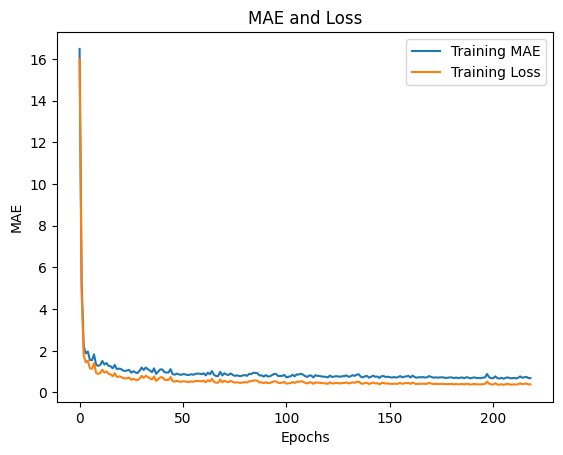

In [50]:
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss))

# Plot mae and loss
plt.plot(epochs, mae, label='Training MAE')
plt.plot(epochs, loss, label='Training Loss')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

# Make Predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
296 296 296


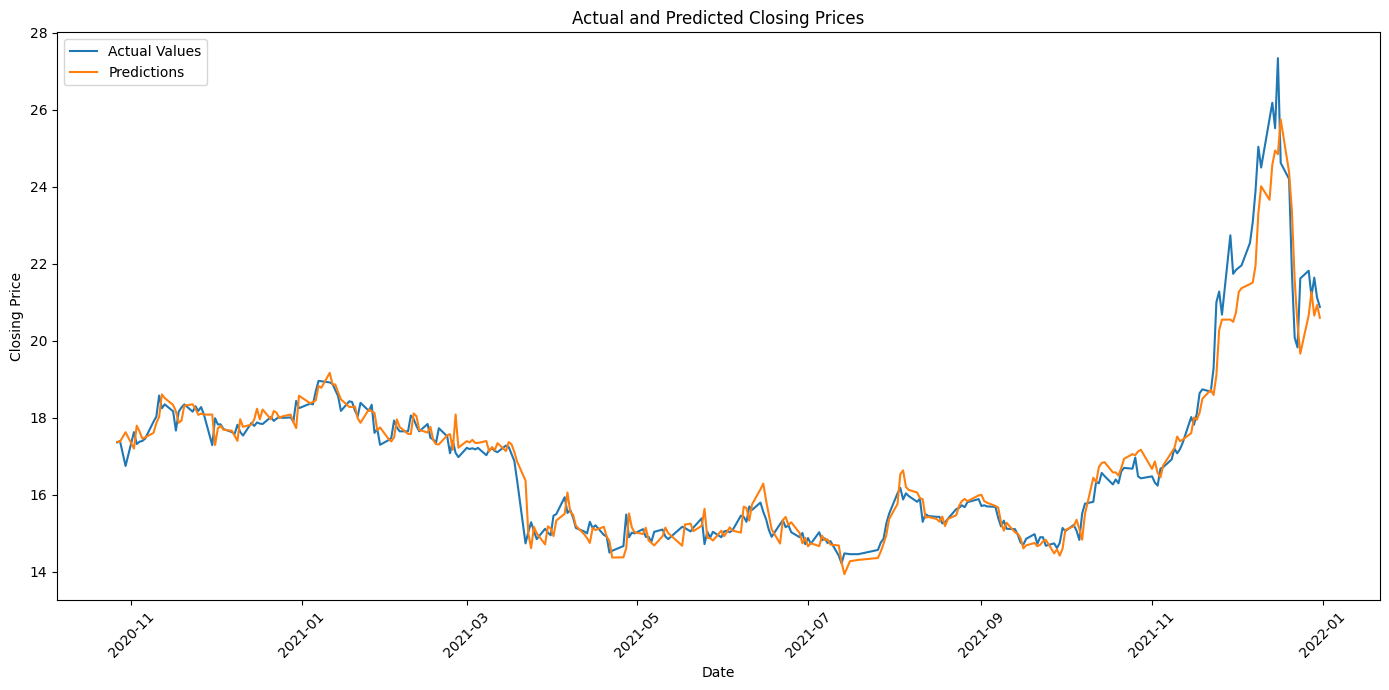

In [51]:
# Generate predictions
predictions = model.predict(x_test)

# Get the dates corresponding to y_test
# Since y_test is created from test_target.values[window_size:], we can slice the dates similarly
y_test_dates = test_data['TRADE DATE'].values[window_size:]

# Ensure that the lengths of y_test_dates, y_test, and predictions match
print(len(y_test_dates), len(y_test), len(predictions))  # Should all be equal

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_dates, y_test, label='Actual Values')
plt.plot(y_test_dates, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("Actual and Predicted Closing Prices")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.3169100843893515
Mean Square Error (MSE): 0.25750082912493194
Root Mean Squared Error (RMSE): 0.5074453952150241


# Save the Model

In [53]:
model = tf.keras.models.load_model('best_model.keras')
model.save_weights("/content/best_model_weights.weights.h5")